# hypothesis testing introduction

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp


from scipy.stats import ttest_rel, ttest_1samp, ttest_ind

%matplotlib inline

In [7]:
diamonds_df = pd.read_csv('../data/raw/diamonds_train.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


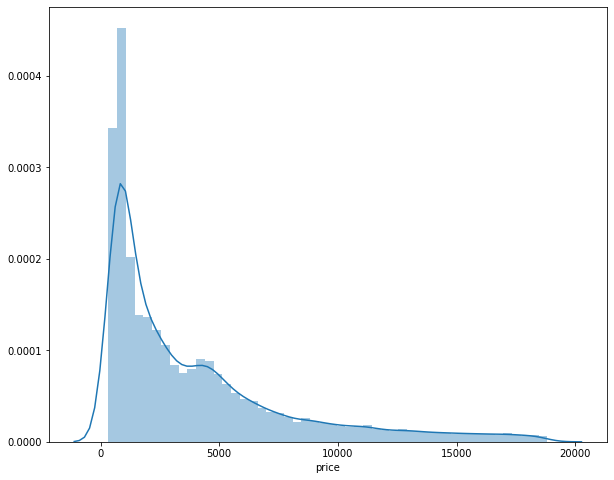

In [9]:
plt.figure(figsize=(10, 8))
x = diamonds_df['price']
ax = sns.distplot(x)

In [16]:
mu = 4000
mu_hat = diamonds_df['price'].mean()
std_hat = diamonds_df['price'].std()
n = len(diamonds_df['price'])

In [17]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

-3.604902369125729

In [27]:
rv = t(df=n-1)
p_value = rv.cdf(t_test) * 2
p_value

0.0003125917132264022

In [24]:
data = diamonds_df['price']
mean = np.mean(data)
std = np.std(data)
sample_size = len(data)
print(mean)

3928.444469163268


In [22]:
t_test = (mean - 4000) / (std / np.sqrt(sample_size))
test_result = ttest_1samp(data, 4000)
p_value = test_result.pvalue

In [23]:
print(test_result)
print(p_value)

Ttest_1sampResult(statistic=-3.604902369125729, pvalue=0.00031264532833074845)
0.00031264532833074845


Rechazamos hipotesis nula, la media de precio de los diamantes esta por debajo de los 4000$

# Sub-Test 3: Ideal cut + color D vs. Ideal cut + color E

In [31]:
diamonds_ideal_cut_d = diamonds_df[(diamonds_df['cut'] == 'Ideal') & (diamonds_df['color'] == 'D')]['price']
diamonds_ideal_cut_e = diamonds_df[(diamonds_df['cut'] == 'Ideal') & (diamonds_df['color'] == 'E')]['price']

In [33]:
print(np.std(diamonds_ideal_cut_d))
print(np.std(diamonds_ideal_cut_e))

2917.5621420315365
3001.969999456429


In [38]:
test_result_1 = ttest_ind(diamonds_ideal_cut_d, diamonds_ideal_cut_e, equal_var=True)
print(test_result_1.pvalue / 2)

0.29622776083819624


In [39]:
test_result_2 = ttest_ind(diamonds_ideal_cut_d, diamonds_ideal_cut_e, equal_var=False)
print(test_result_2.pvalue / 2)

0.295437530000524


30% de que el resultado sea una casualidad